In [ ]:
# Research Questions: 
# PART I :Among the six films, which ones are the most similar, according to its color palette?
# PART II :Is there a typical color palette used in Wong Kar-wai's films, as a distinct feature of its cinematography?

In [178]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd

!pip install colorthief
from colorthief import ColorThief
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import glob as glob
from PIL import Image

In [179]:
# save directory of images as lists

path_dobw='c:\\Users\\Administrator\\Desktop\\【Collecting data】\\A3_Color palatte_Wong Kar-wai\\Days_of_being_wild'
p_d = []
for filename in os.listdir(path_dobw):
    p_d.append(os.path.join(path_dobw,filename))

path_ce='c:\\Users\\Administrator\\Desktop\\【Collecting data】\\A3_Color palatte_Wong Kar-wai\\Chungking_Express'
p_c = []
for filename in os.listdir(path_ce):
    p_c.append(os.path.join(path_ce,filename))

path_fa='c:\\Users\\Administrator\\Desktop\\【Collecting data】\\A3_Color palatte_Wong Kar-wai\\Fallen_Angels'
p_f = []
for filename in os.listdir(path_fa):
    p_f.append(os.path.join(path_fa,filename))

path_ht='c:\\Users\\Administrator\\Desktop\\【Collecting data】\\A3_Color palatte_Wong Kar-wai\\Happy_Together'
p_h = []
for filename in os.listdir(path_ht):
    p_h.append(os.path.join(path_ht,filename))

path_itmfl='c:\\Users\\Administrator\\Desktop\\【Collecting data】\\A3_Color palatte_Wong Kar-wai\\In_the_mood_for_love'
p_i = []
for filename in os.listdir(path_itmfl):
    p_i.append(os.path.join(path_itmfl,filename))

path_2046='c:\\Users\\Administrator\\Desktop\\【Collecting data】\\A3_Color palatte_Wong Kar-wai\\2046'
p_2 = []
for filename in os.listdir(path_2046):
    p_2.append(os.path.join(path_2046,filename))

PART I :Among the six films, which ones are the most similar, according to its color palette?

In [ ]:
# Analysis within the dataset created later, which contains RGB values scraped from screenshots of each film

In [180]:
# write a function to save RGB coordinates of all colors selected into lists
# (ColorThief is applied to extract 5 most prominent colors in each image)
def get_6(p_files):
    palette_files = []
    for c in p_files:
        color_thief = ColorThief(c)
        palette = color_thief.get_palette(color_count=5)
        palette_files = palette_files + palette
    return palette_files

# apply the function
co_d = get_6(p_d)
co_c = get_6(p_c)
co_f = get_6(p_f)
co_h = get_6(p_h)
co_i = get_6(p_i)
co_2 = get_6(p_2)

In [181]:
# then write a function to convert lists into dataframes

def get_df(coordinates):
    df = pd.DataFrame(coordinates, columns =['Red', 'Green', 'Blue'])
    return df

# apply the function
df_d = get_df(co_d)
df_c = get_df(co_c)
df_f = get_df(co_f)
df_h = get_df(co_h)
df_i = get_df(co_i)
df_2 = get_df(co_2)

# example output
df_d

,Red,Green,Blue
0,28,32,28
1,129,153,138
2,80,99,93
3,127,96,102
4,109,118,126
...,...,...,...
325,14,26,12
326,147,201,179
327,66,110,83
328,57,129,137


In [183]:
# write a function to split all RGB values into three categories ('Red', 'Green' and 'Blue'), according to the largest number among (red, green, blue)
# e.g. if the RGB value of a color is (150, 70, 50), then it is added into 'Red' category because 150>70>50
# then calculate the mean RGB value of each category
# the three RGB values we got finally are namely the representative colors of this movie palette

def mean_colors(co):
    red = []
    green = []
    blue = []

    for rgb in co:
        R = rgb[0]
        G = rgb[1]
        B = rgb[2]
        if R > G and R > B:
            red.append(rgb)
        if G > R and G > B:
            green.append(rgb)
        if B > R and B > G:
            blue.append(rgb)
    
    df_r = pd.DataFrame(red, columns = ['Red_r','Green_r','Blue_r'])
    df_g = pd.DataFrame(green, columns = ['Red_g','Green_g','Blue_g'])
    df_b = pd.DataFrame(blue, columns = ['Red_b','Green_b','Blue_b'])

    mean_r = df_r.mean()
    mean_g = df_g.mean()
    mean_b = df_b.mean()

    color_r = mean_r.tolist()
    color_g = mean_g.tolist()
    color_b = mean_b.tolist()

    return color_r, color_g, color_b

# apply this function to all each movie palette and save the results to new variables
repre_d = mean_colors(co_d)
repre_c = mean_colors(co_c)
repre_f = mean_colors(co_f)
repre_h = mean_colors(co_h)
repre_i = mean_colors(co_i)
repre_2 = mean_colors(co_2)

In [185]:
# the last step is to calculate the similarity factor among these representative color sets, to see to what extent do movie palettes similar with each other

# convert lists back to dataframe and reset the index
indexx = ['Category R','Category G','Category B']
columnss = ['Red','Green','Blue']
df_d2 = pd.DataFrame(repre_d, index=indexx, columns=columnss)
df_c2 = pd.DataFrame(repre_c, index=indexx, columns=columnss)
df_f2 = pd.DataFrame(repre_f, index=indexx, columns=columnss)
df_h2 = pd.DataFrame(repre_h, index=indexx, columns=columnss)
df_i2 = pd.DataFrame(repre_i, index=indexx, columns=columnss)
df_22 = pd.DataFrame(repre_2, index=indexx, columns=columnss)

# use Pandas to count standard deviation of each RGB, representing the spread of coordinates
# standard deviation: a measure of the amount of variation or dispersion of a set of values (Wikipedia)
var_d = df_d2.std(axis = 1)
var_c = df_c2.std(axis = 1)
var_f = df_f2.std(axis = 1)
var_h = df_h2.std(axis = 1)
var_i = df_i2.std(axis = 1)
var_2 = df_22.std(axis = 1)
# convert series to list
sd = var_d.tolist()
sc = var_c.tolist()
sf = var_f.tolist()
sh = var_h.tolist()
si = var_i.tolist()
s2 = var_2.tolist()
# merge all lists into one dataframe
movies = ['Days of Being Wild','Chungking Express','Fallen Angels','Happy Together','In the Mood for Love','2046']
simi_fac = pd.DataFrame([sd,sc,sf,sh,si,s2],index=movies,columns=indexx)
simi_fac.to_csv('Similarity factor.csv')
simi_fac

,Category R,Category G,Category B
Days of Being Wild,17.048202,15.030700,28.058656
Chungking Express,32.027830,12.392968,27.900755
Fallen Angels,30.905133,18.654670,12.765624
Happy Together,36.694889,21.147747,22.165531
In the Mood for Love,15.812928,11.856825,13.141277
2046,19.193631,13.235000,19.441045


In [186]:
# count the correlation among all movie palettes to show similarity
corr_fac = simi_fac.T.corr()
corr_fac.to_csv('Correlation factor.csv')
corr_fac = corr_fac.abs()
corr_fac

,Days of Being Wild,Chungking Express,Fallen Angels,Happy Together,In the Mood for Love,2046
Days of Being Wild,1.000000,0.450464,0.646561,0.315228,0.055362,0.646638
Chungking Express,0.450464,1.000000,0.389826,0.705278,0.866487,0.972308
Fallen Angels,0.646561,0.389826,1.000000,0.927782,0.797487,0.163818
Happy Together,0.315228,0.705278,0.927782,1.000000,0.965012,0.520068
In the Mood for Love,0.055362,0.866487,0.797487,0.965012,1.000000,0.725828
2046,0.646638,0.972308,0.163818,0.520068,0.725828,1.000000


In [194]:
# locate the movie pairs that are mostly similar by its movie palettes
most_similar = corr_fac.idxmin()
# convert the results to df and export csv file
movie_pairs = most_similar.to_frame()
movie_pairs.to_csv('Movie pairs that are the most similar.csv')
movie_pairs.head(3)

,0
Days of Being Wild,In the Mood for Love
Chungking Express,Fallen Angels
Fallen Angels,2046


In [ ]:
# Conclusion:
# Movies that have most similar color palettes are 
# 'Days of Being Wild(1990)' and 'In the Mood for Love(2000)', 
# 'Chungking Express(1994)' and 'Fallen Angels(1995)', 
# as well as 'Fallen Angels(1995)' and '2046(2004)'.

PART II :Is there a typical color palette used in Wong Kar-wai's films, as a distinct feature of its cinematography?

In [ ]:
# Then I'm going to visualize coordinates of colors in each movie palettes in a xyz axis

In [ ]:
# To find if there's a certain pattern of color match,
# 1. images will be read as pixels and recorded according to RGB code system
#    data are in the form of (red,green,blue), and will be stored in ndarray objects
# 2. Then the array will be visualized in scatter plots to see
#    if the color palette in most films are similar

In [74]:
# write a function to extract and show dominant colors (top5 each image) in scatter plots

def get_color(p):

    # first, extract dominant colors in every image and add them to one list
    palette = []
    for img in p:
        colors = ColorThief(img)
        domint_c = colors.get_color(quality=5)
        palette.append(domint_c)

    # categorize values under categories of 'R','B' and 'G'
    x = []
    y = []
    z = []
    for rgb in palette:
        x.append(rgb[0])
        y.append(rgb[1])
        z.append(rgb[2])

    # create the 3Dplot and assign values into it
    fig = plt.figure(figsize = (7, 6))
    ax = plt.axes(projection ="3d")
    
    ax.scatter3D(x, y, z, color='grey')
    plt.show()
    return plt.show()

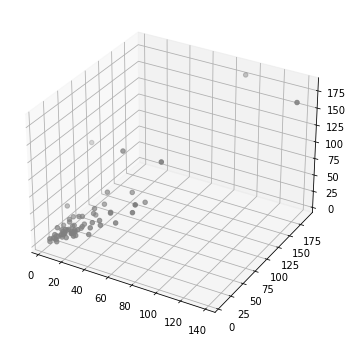

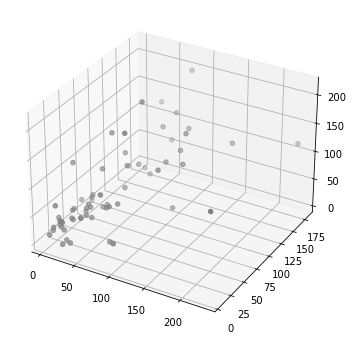

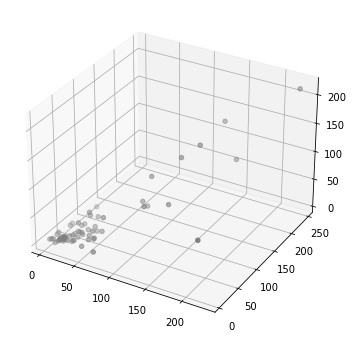

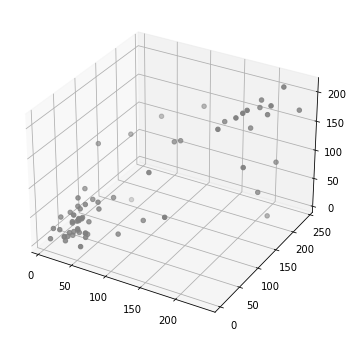

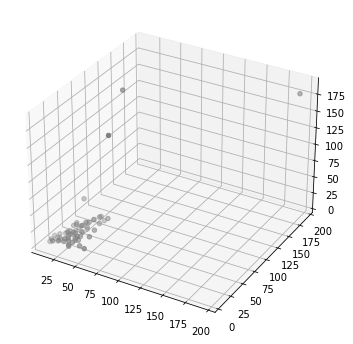

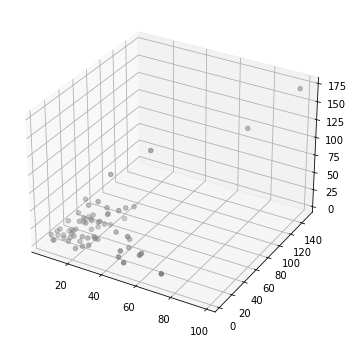

In [75]:
# Now use the new function to make 3D scatter plot for each movie
#  and subsequently compare them to see if there's a pattern

# Days Of Being Wild (Wong Kar-wai, 1990)
get_color(p_d)

# Chungking Express (Wong Kar-wai, 1994)
get_color(p_c)

# Fallen Angels (Wong Kar-wai, 1995)
get_color(p_f)

# Happy Together (Wong Kar-wai, 1997)
get_color(p_h)

# In The Mood For Love (Wong Kar-wai, 2000)
get_color(p_i)

# 2046 (Wong Kar-wai, 2004)
get_color(p_2)

In [ ]:
# Conclusion:
# These plots roughly revealed that there does exist a set of colors that is used more often.

In [ ]:
# References:

#   https://film-grab.com/2014/09/25/fallen-angels/
#   https://film-grab.com/2014/02/19/happy-together/
#   https://film-grab.com/2014/10/20/chungking-express/
#   https://film-grab.com/2014/02/20/2046/
#   https://film-grab.com/2013/03/09/in-the-mood-for-love/
#   https://film-grab.com/2014/02/17/days-of-being-wild/

#   https://github.com/MarsWilliams/wesandersone
#   https://china-underground.com/wp/tag/wong-kar-wai/

#   https://independent-photo.com/news/wong-kar-wai-color-obsession/
#   https://independent-photo.com/news/a-brief-history-of-color-photography/